In [1]:
import pandas as pd
import random
from matplotlib import pyplot as plt
import numpy as np
from time import sleep
import datetime
from playsound import playsound
from pydub import AudioSegment
from pydub.playback import play
from IPython.display import clear_output
import pandas as pd
from lib.mbot2 import Robot

# Init

In [2]:
robot = Robot("/dev/ttyUSB0", debug=False)

# RGB LED

In [ ]:
for _ in range(10):
    robot.do_rgb_led_on_board(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    sleep(0.5)

# Line follower

In [ ]:
robot.request_line_follower(2)

# Light sensor

In [ ]:
robot.do_rgb_led_on_board(0, 0, 0)
robot.request_light_on_board()

# Ultra sonic sensor

In [ ]:
robot.request_ultrasonic_sensor(3)

# Buzzer

In [ ]:
music = ["E4","E4","F4","G4","G4","F4","E4","D4","C4","C4","D4","E4","E4","D4","D4"]
for tone in music:
    robot.do_buzzer(tone ,500)

# Motor

In [ ]:
robot.do_move(0, 255)

In [ ]:
robot.do_move(255, 0)

In [ ]:
robot.do_move(0, 0)

# play sound

In [ ]:
song = AudioSegment.from_wav('/home/erez/test.wav')

In [ ]:
while True:
    distance = robot.request_ultrasonic_sensor(3)
    print(distance)
    if distance < 5: 
        print('playing')
        play(song)
    clear_output(wait=True)        

# avoid obstacle

In [5]:
sensors_samples_list = []
start = datetime.datetime.now()
robot.do_move(255, 255)
robot.do_rgb_led_on_board(0, 0, 0)
while (datetime.datetime.now() - start).total_seconds() < 5:
    light = robot.request_light_on_board()
    distance = robot.request_ultrasonic_sensor(3)
    line_follower = robot.request_line_follower(2)
#     sleep(0.1)
    sound = robot.request_sound_sensor(4)
    sensors_sample = (light, distance, line_follower, sound)
    sensors_samples_list.append(sensors_sample)
robot.do_move(0, 0)

In [6]:
sensors_df = pd.DataFrame(sensors_samples_list, columns=['light', 'distance', 'line_follower', 'sound'])
sensors_df

,light,distance,line_follower,sound
0,990.0,57.568966,3.0,538.0
1,986.0,40.982758,3.0,536.0
2,983.0,30.775862,3.0,555.0
3,990.0,19.844828,3.0,517.0
4,970.0,7.827586,3.0,548.0
5,967.0,3.879310,3.0,526.0
6,969.0,4.000000,3.0,523.0
7,976.0,3.465517,3.0,557.0
8,967.0,3.534483,3.0,536.0
9,977.0,3.500000,3.0,578.0


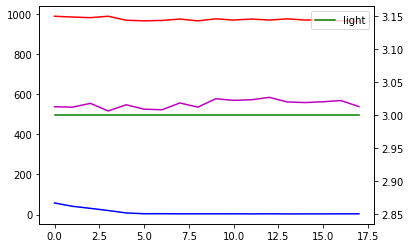

In [7]:
sensors_df['light'].plot(color='r')
sensors_df['distance'].plot(color='b')
sensors_df['sound'].plot(color='m')
sensors_df['line_follower'].plot(secondary_y=True, color='g')
plt.legend(['light', 'line_follower', 'distance'])